In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Question 1
# Suppose the data for analysis includes the attribute age. The age values for the
# data tuples are (in increasing order)
ages = [13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 23, 25, 25, 25, 30, 33,
33, 33, 33, 35, 35, 36, 40, 45, 46, 52, 70]

In [11]:
#a
agesMean = np.mean(ages)
print(agesMean)
#The mean of the ages is 29.74

29.74074074074074


In [10]:
#b
agesMode = pd.Series(ages).mode()
print(agesMode)
#The mode of the ages is 33. This data set is unimodal because there is only one mode.

0    33
dtype: int64


In [ ]:
#c
agesFirstHalf = ages[:13]
agesQ1 = np.median(agesFirstHalf)
print(agesQ1)
agesSecondHalf = ages[12:]
agesQ3 = np.median(agesSecondHalf)
print(agesQ3)
#The first quartile is 20, and the third quartile is 35.

20.0
35.0


In [19]:
#d
agesMedian = np.median(ages)
print(agesMedian)
#The minimum is 13, the first quartile is 20, the median is 25, the third quartile is 35, and the maximum is 70.

25.0


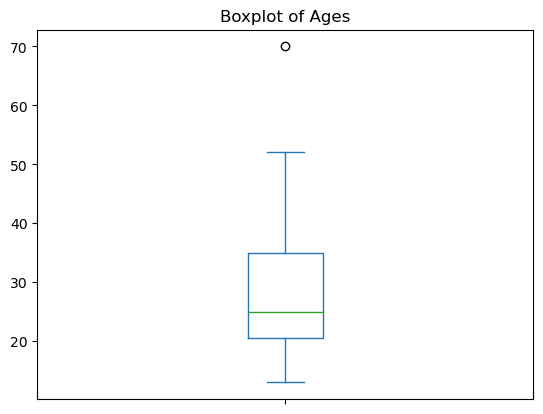

In [22]:
#e
pd.Series(ages).plot(kind="box", title="Boxplot of Ages")
plt.show()


In [23]:
# Question 2
Hitters = pd.read_csv('../data/Hitters.csv')
Hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [ ]:
#a
